In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv("F:\Data Science\Menternships\Employee Performance Prediction\Data\Train_data.csv")
test = pd.read_csv("F:\Data Science\Menternships\Employee Performance Prediction\Data\Test_data.csv")
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [2]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


#### EDA and Insights

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [5]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [7]:
# checking the skewness

print(train['previous_year_rating'].skew())

print(test['previous_year_rating'].skew())

-0.3106378431385327
-0.32470789207738204


In [8]:
# replacing the categorical column with mode and low skewness column with median

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].median())

test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].median())

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['department'] = le.fit_transform(train['department'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

train['region'] = le.fit_transform(train['region'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

train['education'] = le.fit_transform(train['education'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

train['gender'] = le.fit_transform(train['gender'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

train['recruitment_channel'] = le.fit_transform(train['recruitment_channel'])
print(dict(zip(le.classes_, le.transform(le.classes_))))



test['department'] = le.fit_transform(test['department'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

test['region'] = le.fit_transform(test['region'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

test['education'] = le.fit_transform(test['education'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

test['gender'] = le.fit_transform(test['gender'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

test['recruitment_channel'] = le.fit_transform(test['recruitment_channel'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Analytics': 0, 'Finance': 1, 'HR': 2, 'Legal': 3, 'Operations': 4, 'Procurement': 5, 'R&D': 6, 'Sales & Marketing': 7, 'Technology': 8}
{'region_1': 0, 'region_10': 1, 'region_11': 2, 'region_12': 3, 'region_13': 4, 'region_14': 5, 'region_15': 6, 'region_16': 7, 'region_17': 8, 'region_18': 9, 'region_19': 10, 'region_2': 11, 'region_20': 12, 'region_21': 13, 'region_22': 14, 'region_23': 15, 'region_24': 16, 'region_25': 17, 'region_26': 18, 'region_27': 19, 'region_28': 20, 'region_29': 21, 'region_3': 22, 'region_30': 23, 'region_31': 24, 'region_32': 25, 'region_33': 26, 'region_34': 27, 'region_4': 28, 'region_5': 29, 'region_6': 30, 'region_7': 31, 'region_8': 32, 'region_9': 33}
{"Bachelor's": 0, 'Below Secondary': 1, "Master's & above": 2}
{'f': 0, 'm': 1}
{'other': 0, 'referred': 1, 'sourcing': 2}
{'Analytics': 0, 'Finance': 1, 'HR': 2, 'Legal': 3, 'Operations': 4, 'Procurement': 5, 'R&D': 6, 'Sales & Marketing': 7, 'Technology': 8}
{'region_1': 0, 'region_10': 1, 'region_1

In [10]:
# dropping the employee_id column
train = train.drop(columns='employee_id')
test = test.drop(columns='employee_id')

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
department,54808.0,4.972796,2.506046,0.0,4.0,5.0,7.0,8.0
region,54808.0,15.428970,8.764954,0.0,11.0,14.0,21.0,33.0
education,54808.0,0.559316,0.889452,0.0,0.0,0.0,2.0,2.0
gender,54808.0,0.702379,0.457216,0.0,0.0,1.0,1.0,1.0
recruitment_channel,54808.0,0.868158,0.980713,0.0,0.0,0.0,2.0,2.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,54808.0,3.304481,1.214770,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0


<AxesSubplot:>

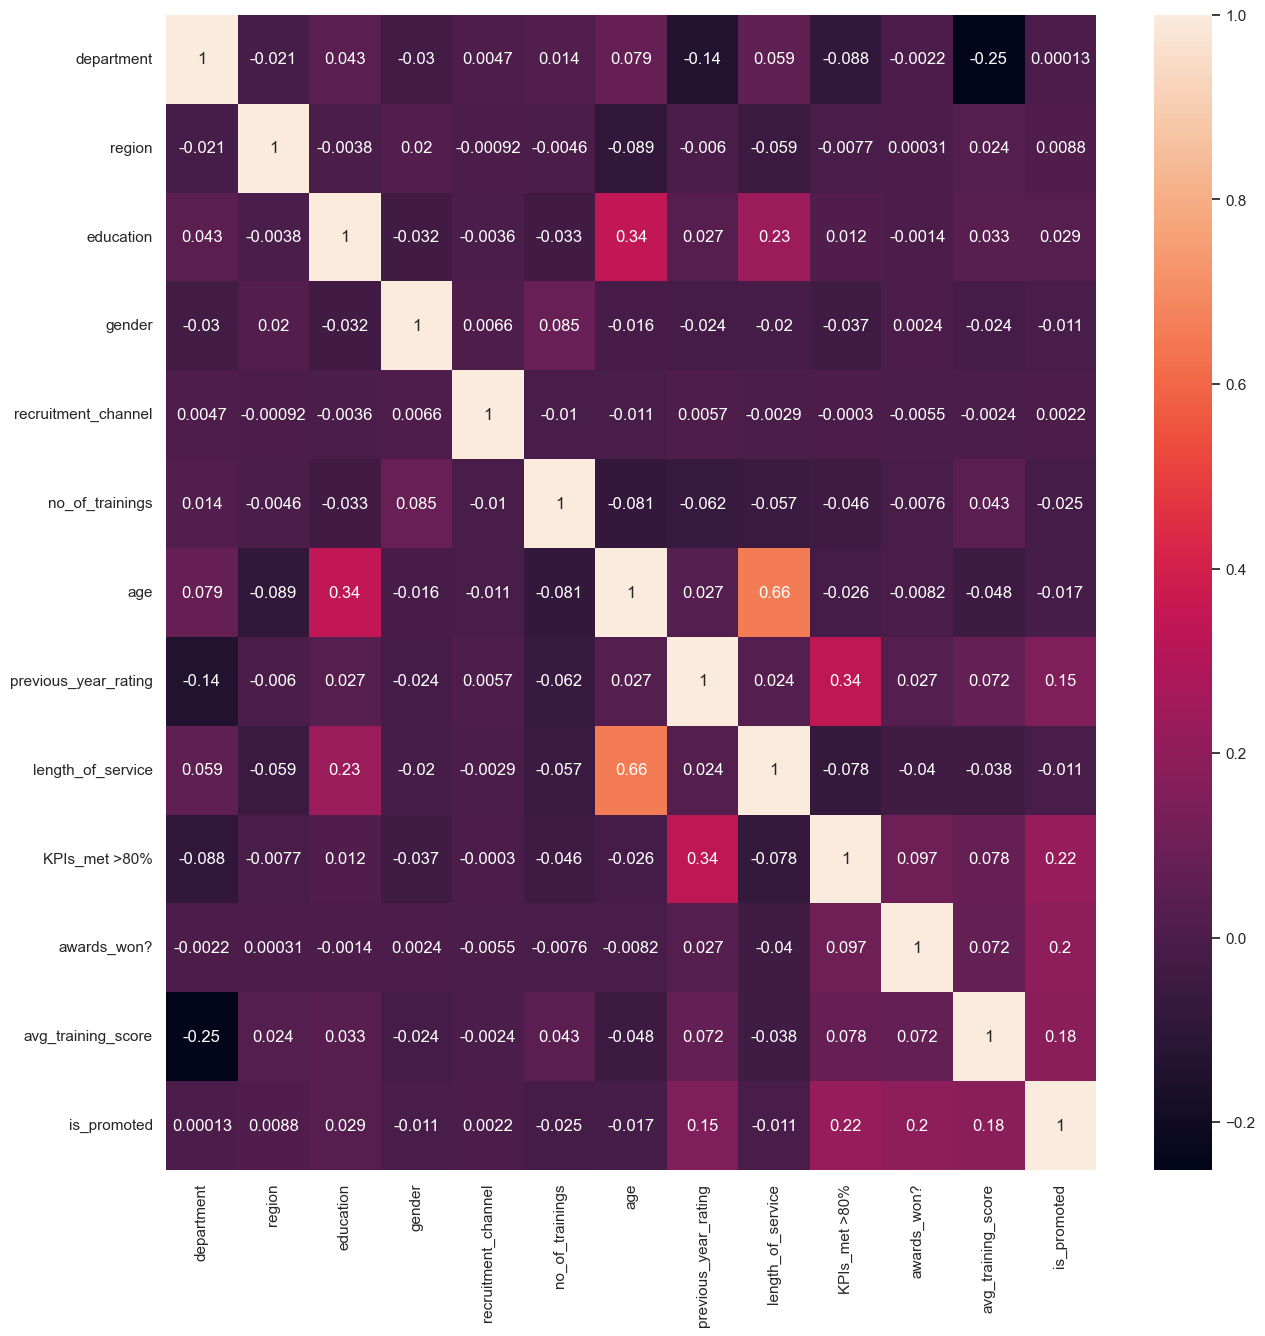

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), annot=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

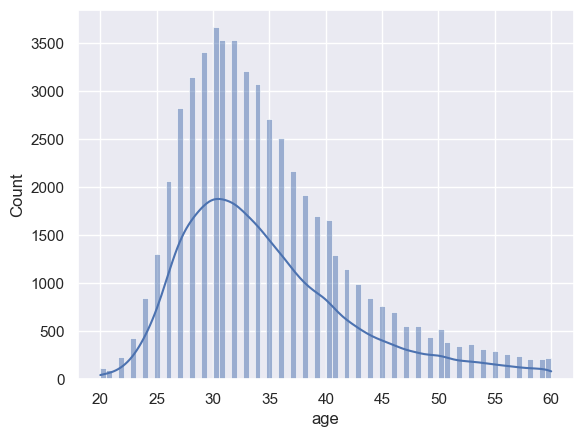

In [13]:
sns.histplot(train['age'], kde=True)

<AxesSubplot:xlabel='avg_training_score', ylabel='Count'>

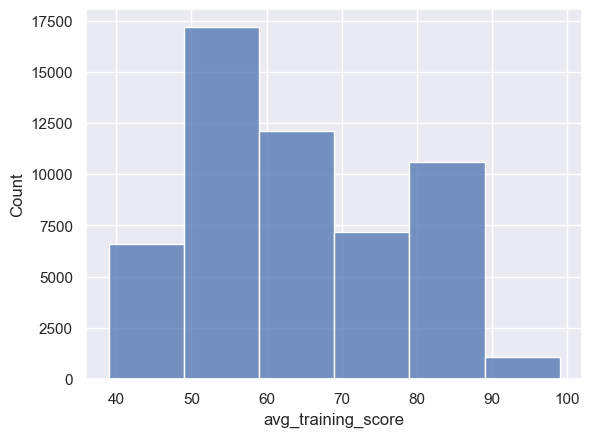

In [14]:
sns.histplot(train['avg_training_score'], bins=6)

In [15]:
# defining x and y

x = train.drop(columns='is_promoted')
y = train[['is_promoted']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=789)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((43846, 12), (10962, 12), (43846, 1), (10962, 1))

In [16]:
# importing necessary scalers and models

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

scalers = {"RobustScaler":RobustScaler(),
          "StandardScaler":StandardScaler(),
          "MinMaxScaler":MinMaxScaler(),
          "MaxAbsScaler":MaxAbsScaler()}

models = {'XGBoost': XGBClassifier(),
          'CatBoost': CatBoostClassifier(),
          'LightGBM': LGBMClassifier()}

In [17]:
results = []

for scaler_name, scaler in scalers.items():
    for model_name, model in models.items():
        # scale the data
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        # train the model
        model.fit(x_train_scaled, y_train)
        
        # predict on test data
        y_pred = model.predict(x_test_scaled)
        
        # Evaluating the model using confusion matrix and accuracy score
        conf_mat = confusion_matrix(y_test, y_pred)
        acc_score = accuracy_score(y_test, y_pred)
        
        # recording the results
        result_entry = {"Scaler":scaler_name,
                       "Model":model_name,
                       "Confusion Matrix":conf_mat,
                       "Accuracy":acc_score}
        results.append(result_entry)
        
# print the results
for result in results:
    print(f"\nResults for {result['Scaler']} + {result['Model']}:")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print(f"Accuracy: {result['Accuracy']}")

Learning rate set to 0.051765
0:	learn: 0.6408870	total: 202ms	remaining: 3m 22s
1:	learn: 0.5838366	total: 231ms	remaining: 1m 55s
2:	learn: 0.5429470	total: 252ms	remaining: 1m 23s
3:	learn: 0.4984332	total: 275ms	remaining: 1m 8s
4:	learn: 0.4671933	total: 297ms	remaining: 59.1s
5:	learn: 0.4320040	total: 318ms	remaining: 52.7s
6:	learn: 0.4101938	total: 338ms	remaining: 48s
7:	learn: 0.3905886	total: 357ms	remaining: 44.3s
8:	learn: 0.3620107	total: 379ms	remaining: 41.7s
9:	learn: 0.3464255	total: 399ms	remaining: 39.5s
10:	learn: 0.3215236	total: 428ms	remaining: 38.4s
11:	learn: 0.3094147	total: 458ms	remaining: 37.7s
12:	learn: 0.2989178	total: 485ms	remaining: 36.8s
13:	learn: 0.2915983	total: 506ms	remaining: 35.6s
14:	learn: 0.2829854	total: 526ms	remaining: 34.5s
15:	learn: 0.2759797	total: 547ms	remaining: 33.6s
16:	learn: 0.2686744	total: 568ms	remaining: 32.9s
17:	learn: 0.2645276	total: 589ms	remaining: 32.1s
18:	learn: 0.2582195	total: 609ms	remaining: 31.5s
19:	learn:

165:	learn: 0.1646238	total: 4.77s	remaining: 24s
166:	learn: 0.1645540	total: 4.8s	remaining: 23.9s
167:	learn: 0.1644651	total: 4.82s	remaining: 23.9s
168:	learn: 0.1644105	total: 4.85s	remaining: 23.9s
169:	learn: 0.1643392	total: 4.88s	remaining: 23.8s
170:	learn: 0.1642810	total: 4.91s	remaining: 23.8s
171:	learn: 0.1640841	total: 4.94s	remaining: 23.8s
172:	learn: 0.1640274	total: 4.98s	remaining: 23.8s
173:	learn: 0.1640068	total: 5.01s	remaining: 23.8s
174:	learn: 0.1639700	total: 5.04s	remaining: 23.7s
175:	learn: 0.1639132	total: 5.06s	remaining: 23.7s
176:	learn: 0.1637772	total: 5.08s	remaining: 23.6s
177:	learn: 0.1637164	total: 5.1s	remaining: 23.6s
178:	learn: 0.1636868	total: 5.12s	remaining: 23.5s
179:	learn: 0.1636480	total: 5.14s	remaining: 23.4s
180:	learn: 0.1634189	total: 5.16s	remaining: 23.4s
181:	learn: 0.1633462	total: 5.18s	remaining: 23.3s
182:	learn: 0.1632378	total: 5.21s	remaining: 23.2s
183:	learn: 0.1632133	total: 5.23s	remaining: 23.2s
184:	learn: 0.16

324:	learn: 0.1541737	total: 8.5s	remaining: 17.7s
325:	learn: 0.1541423	total: 8.53s	remaining: 17.6s
326:	learn: 0.1541110	total: 8.55s	remaining: 17.6s
327:	learn: 0.1540534	total: 8.58s	remaining: 17.6s
328:	learn: 0.1540087	total: 8.6s	remaining: 17.5s
329:	learn: 0.1538581	total: 8.63s	remaining: 17.5s
330:	learn: 0.1538099	total: 8.65s	remaining: 17.5s
331:	learn: 0.1536886	total: 8.67s	remaining: 17.5s
332:	learn: 0.1535867	total: 8.7s	remaining: 17.4s
333:	learn: 0.1534522	total: 8.72s	remaining: 17.4s
334:	learn: 0.1534251	total: 8.75s	remaining: 17.4s
335:	learn: 0.1533904	total: 8.77s	remaining: 17.3s
336:	learn: 0.1533589	total: 8.79s	remaining: 17.3s
337:	learn: 0.1532361	total: 8.82s	remaining: 17.3s
338:	learn: 0.1532169	total: 8.84s	remaining: 17.2s
339:	learn: 0.1531776	total: 8.86s	remaining: 17.2s
340:	learn: 0.1531486	total: 8.88s	remaining: 17.2s
341:	learn: 0.1531143	total: 8.9s	remaining: 17.1s
342:	learn: 0.1530363	total: 8.93s	remaining: 17.1s
343:	learn: 0.15

483:	learn: 0.1472679	total: 12.5s	remaining: 13.3s
484:	learn: 0.1472157	total: 12.5s	remaining: 13.3s
485:	learn: 0.1471805	total: 12.6s	remaining: 13.3s
486:	learn: 0.1471613	total: 12.6s	remaining: 13.3s
487:	learn: 0.1471433	total: 12.7s	remaining: 13.3s
488:	learn: 0.1470985	total: 12.7s	remaining: 13.3s
489:	learn: 0.1470630	total: 12.7s	remaining: 13.2s
490:	learn: 0.1470381	total: 12.8s	remaining: 13.2s
491:	learn: 0.1470160	total: 12.8s	remaining: 13.2s
492:	learn: 0.1469807	total: 12.8s	remaining: 13.2s
493:	learn: 0.1469413	total: 12.9s	remaining: 13.2s
494:	learn: 0.1469010	total: 12.9s	remaining: 13.2s
495:	learn: 0.1468482	total: 12.9s	remaining: 13.1s
496:	learn: 0.1468007	total: 13s	remaining: 13.1s
497:	learn: 0.1467582	total: 13s	remaining: 13.1s
498:	learn: 0.1467448	total: 13s	remaining: 13.1s
499:	learn: 0.1467025	total: 13s	remaining: 13s
500:	learn: 0.1466761	total: 13.1s	remaining: 13s
501:	learn: 0.1466571	total: 13.1s	remaining: 13s
502:	learn: 0.1466297	tota

646:	learn: 0.1421473	total: 16.7s	remaining: 9.11s
647:	learn: 0.1421168	total: 16.7s	remaining: 9.09s
648:	learn: 0.1420905	total: 16.7s	remaining: 9.06s
649:	learn: 0.1420591	total: 16.8s	remaining: 9.03s
650:	learn: 0.1420319	total: 16.8s	remaining: 9.01s
651:	learn: 0.1419982	total: 16.8s	remaining: 8.98s
652:	learn: 0.1419608	total: 16.8s	remaining: 8.95s
653:	learn: 0.1419149	total: 16.9s	remaining: 8.92s
654:	learn: 0.1418711	total: 16.9s	remaining: 8.89s
655:	learn: 0.1418321	total: 16.9s	remaining: 8.87s
656:	learn: 0.1418057	total: 16.9s	remaining: 8.84s
657:	learn: 0.1417736	total: 17s	remaining: 8.81s
658:	learn: 0.1417447	total: 17s	remaining: 8.79s
659:	learn: 0.1416975	total: 17s	remaining: 8.76s
660:	learn: 0.1416586	total: 17s	remaining: 8.74s
661:	learn: 0.1416290	total: 17.1s	remaining: 8.71s
662:	learn: 0.1415828	total: 17.1s	remaining: 8.68s
663:	learn: 0.1415530	total: 17.1s	remaining: 8.65s
664:	learn: 0.1415216	total: 17.1s	remaining: 8.63s
665:	learn: 0.141470

812:	learn: 0.1374752	total: 21.1s	remaining: 4.85s
813:	learn: 0.1374555	total: 21.1s	remaining: 4.83s
814:	learn: 0.1374346	total: 21.1s	remaining: 4.8s
815:	learn: 0.1374143	total: 21.2s	remaining: 4.77s
816:	learn: 0.1373886	total: 21.2s	remaining: 4.75s
817:	learn: 0.1373687	total: 21.2s	remaining: 4.72s
818:	learn: 0.1373326	total: 21.2s	remaining: 4.69s
819:	learn: 0.1373292	total: 21.3s	remaining: 4.67s
820:	learn: 0.1373125	total: 21.3s	remaining: 4.64s
821:	learn: 0.1372908	total: 21.3s	remaining: 4.62s
822:	learn: 0.1372692	total: 21.3s	remaining: 4.59s
823:	learn: 0.1372484	total: 21.4s	remaining: 4.56s
824:	learn: 0.1372065	total: 21.4s	remaining: 4.54s
825:	learn: 0.1371732	total: 21.4s	remaining: 4.51s
826:	learn: 0.1371605	total: 21.4s	remaining: 4.48s
827:	learn: 0.1371366	total: 21.4s	remaining: 4.46s
828:	learn: 0.1371157	total: 21.5s	remaining: 4.43s
829:	learn: 0.1370812	total: 21.5s	remaining: 4.4s
830:	learn: 0.1370500	total: 21.5s	remaining: 4.38s
831:	learn: 0.

972:	learn: 0.1333139	total: 24.9s	remaining: 692ms
973:	learn: 0.1332879	total: 24.9s	remaining: 666ms
974:	learn: 0.1332599	total: 25s	remaining: 641ms
975:	learn: 0.1332266	total: 25s	remaining: 615ms
976:	learn: 0.1332059	total: 25s	remaining: 589ms
977:	learn: 0.1331865	total: 25.1s	remaining: 564ms
978:	learn: 0.1331580	total: 25.1s	remaining: 538ms
979:	learn: 0.1331199	total: 25.1s	remaining: 512ms
980:	learn: 0.1330874	total: 25.1s	remaining: 486ms
981:	learn: 0.1330677	total: 25.1s	remaining: 461ms
982:	learn: 0.1330457	total: 25.2s	remaining: 435ms
983:	learn: 0.1330198	total: 25.2s	remaining: 410ms
984:	learn: 0.1329983	total: 25.2s	remaining: 384ms
985:	learn: 0.1329747	total: 25.2s	remaining: 358ms
986:	learn: 0.1329461	total: 25.3s	remaining: 333ms
987:	learn: 0.1329085	total: 25.3s	remaining: 307ms
988:	learn: 0.1328559	total: 25.3s	remaining: 282ms
989:	learn: 0.1328194	total: 25.4s	remaining: 256ms
990:	learn: 0.1327861	total: 25.4s	remaining: 231ms
991:	learn: 0.1327

124:	learn: 0.1703065	total: 3.16s	remaining: 22.1s
125:	learn: 0.1698444	total: 3.18s	remaining: 22.1s
126:	learn: 0.1697978	total: 3.22s	remaining: 22.1s
127:	learn: 0.1697300	total: 3.24s	remaining: 22.1s
128:	learn: 0.1689109	total: 3.27s	remaining: 22.1s
129:	learn: 0.1688202	total: 3.3s	remaining: 22.1s
130:	learn: 0.1687762	total: 3.33s	remaining: 22.1s
131:	learn: 0.1687287	total: 3.35s	remaining: 22.1s
132:	learn: 0.1686889	total: 3.38s	remaining: 22s
133:	learn: 0.1686151	total: 3.41s	remaining: 22s
134:	learn: 0.1685346	total: 3.43s	remaining: 22s
135:	learn: 0.1684696	total: 3.45s	remaining: 21.9s
136:	learn: 0.1682593	total: 3.48s	remaining: 21.9s
137:	learn: 0.1681198	total: 3.5s	remaining: 21.9s
138:	learn: 0.1678509	total: 3.52s	remaining: 21.8s
139:	learn: 0.1674967	total: 3.55s	remaining: 21.8s
140:	learn: 0.1673369	total: 3.57s	remaining: 21.7s
141:	learn: 0.1672198	total: 3.6s	remaining: 21.7s
142:	learn: 0.1671703	total: 3.63s	remaining: 21.7s
143:	learn: 0.1669689

286:	learn: 0.1565641	total: 7.27s	remaining: 18.1s
287:	learn: 0.1565009	total: 7.3s	remaining: 18.1s
288:	learn: 0.1564651	total: 7.33s	remaining: 18s
289:	learn: 0.1564215	total: 7.35s	remaining: 18s
290:	learn: 0.1563250	total: 7.37s	remaining: 18s
291:	learn: 0.1562859	total: 7.39s	remaining: 17.9s
292:	learn: 0.1562279	total: 7.42s	remaining: 17.9s
293:	learn: 0.1562044	total: 7.44s	remaining: 17.9s
294:	learn: 0.1561617	total: 7.46s	remaining: 17.8s
295:	learn: 0.1561087	total: 7.49s	remaining: 17.8s
296:	learn: 0.1560219	total: 7.52s	remaining: 17.8s
297:	learn: 0.1559851	total: 7.54s	remaining: 17.8s
298:	learn: 0.1559388	total: 7.56s	remaining: 17.7s
299:	learn: 0.1558839	total: 7.58s	remaining: 17.7s
300:	learn: 0.1558170	total: 7.61s	remaining: 17.7s
301:	learn: 0.1557875	total: 7.63s	remaining: 17.6s
302:	learn: 0.1557406	total: 7.65s	remaining: 17.6s
303:	learn: 0.1555259	total: 7.68s	remaining: 17.6s
304:	learn: 0.1554784	total: 7.7s	remaining: 17.6s
305:	learn: 0.155406

449:	learn: 0.1484788	total: 11.1s	remaining: 13.5s
450:	learn: 0.1484489	total: 11.1s	remaining: 13.5s
451:	learn: 0.1484085	total: 11.1s	remaining: 13.5s
452:	learn: 0.1483886	total: 11.2s	remaining: 13.5s
453:	learn: 0.1483455	total: 11.2s	remaining: 13.4s
454:	learn: 0.1483178	total: 11.2s	remaining: 13.4s
455:	learn: 0.1482830	total: 11.2s	remaining: 13.4s
456:	learn: 0.1482658	total: 11.2s	remaining: 13.4s
457:	learn: 0.1482276	total: 11.3s	remaining: 13.3s
458:	learn: 0.1481811	total: 11.3s	remaining: 13.3s
459:	learn: 0.1481524	total: 11.3s	remaining: 13.3s
460:	learn: 0.1480127	total: 11.3s	remaining: 13.3s
461:	learn: 0.1479846	total: 11.4s	remaining: 13.2s
462:	learn: 0.1479485	total: 11.4s	remaining: 13.2s
463:	learn: 0.1479178	total: 11.4s	remaining: 13.2s
464:	learn: 0.1478752	total: 11.4s	remaining: 13.1s
465:	learn: 0.1478451	total: 11.4s	remaining: 13.1s
466:	learn: 0.1478208	total: 11.5s	remaining: 13.1s
467:	learn: 0.1478040	total: 11.5s	remaining: 13.1s
468:	learn: 

608:	learn: 0.1432973	total: 14.7s	remaining: 9.42s
609:	learn: 0.1432809	total: 14.7s	remaining: 9.4s
610:	learn: 0.1432690	total: 14.7s	remaining: 9.37s
611:	learn: 0.1432386	total: 14.7s	remaining: 9.35s
612:	learn: 0.1432070	total: 14.8s	remaining: 9.33s
613:	learn: 0.1431782	total: 14.8s	remaining: 9.3s
614:	learn: 0.1431498	total: 14.8s	remaining: 9.28s
615:	learn: 0.1431142	total: 14.8s	remaining: 9.25s
616:	learn: 0.1430940	total: 14.9s	remaining: 9.22s
617:	learn: 0.1430360	total: 14.9s	remaining: 9.2s
618:	learn: 0.1430069	total: 14.9s	remaining: 9.18s
619:	learn: 0.1429997	total: 14.9s	remaining: 9.15s
620:	learn: 0.1429664	total: 15s	remaining: 9.13s
621:	learn: 0.1429219	total: 15s	remaining: 9.1s
622:	learn: 0.1428790	total: 15s	remaining: 9.08s
623:	learn: 0.1428526	total: 15s	remaining: 9.05s
624:	learn: 0.1428318	total: 15s	remaining: 9.02s
625:	learn: 0.1428192	total: 15.1s	remaining: 9s
626:	learn: 0.1428044	total: 15.1s	remaining: 8.97s
627:	learn: 0.1427702	total: 

776:	learn: 0.1385162	total: 18.4s	remaining: 5.27s
777:	learn: 0.1384901	total: 18.4s	remaining: 5.25s
778:	learn: 0.1384674	total: 18.4s	remaining: 5.22s
779:	learn: 0.1384393	total: 18.4s	remaining: 5.2s
780:	learn: 0.1384069	total: 18.5s	remaining: 5.17s
781:	learn: 0.1384021	total: 18.5s	remaining: 5.15s
782:	learn: 0.1383748	total: 18.5s	remaining: 5.12s
783:	learn: 0.1383443	total: 18.5s	remaining: 5.1s
784:	learn: 0.1383223	total: 18.5s	remaining: 5.08s
785:	learn: 0.1382863	total: 18.6s	remaining: 5.05s
786:	learn: 0.1382610	total: 18.6s	remaining: 5.03s
787:	learn: 0.1382364	total: 18.6s	remaining: 5s
788:	learn: 0.1382343	total: 18.6s	remaining: 4.98s
789:	learn: 0.1382067	total: 18.6s	remaining: 4.96s
790:	learn: 0.1381498	total: 18.7s	remaining: 4.93s
791:	learn: 0.1381388	total: 18.7s	remaining: 4.91s
792:	learn: 0.1380966	total: 18.7s	remaining: 4.88s
793:	learn: 0.1380615	total: 18.7s	remaining: 4.86s
794:	learn: 0.1380472	total: 18.7s	remaining: 4.83s
795:	learn: 0.138

941:	learn: 0.1341898	total: 22.2s	remaining: 1.37s
942:	learn: 0.1341623	total: 22.3s	remaining: 1.34s
943:	learn: 0.1341270	total: 22.3s	remaining: 1.32s
944:	learn: 0.1341074	total: 22.3s	remaining: 1.3s
945:	learn: 0.1340719	total: 22.3s	remaining: 1.27s
946:	learn: 0.1340384	total: 22.4s	remaining: 1.25s
947:	learn: 0.1340098	total: 22.4s	remaining: 1.23s
948:	learn: 0.1339815	total: 22.4s	remaining: 1.2s
949:	learn: 0.1339525	total: 22.4s	remaining: 1.18s
950:	learn: 0.1339276	total: 22.4s	remaining: 1.16s
951:	learn: 0.1339052	total: 22.5s	remaining: 1.13s
952:	learn: 0.1338747	total: 22.5s	remaining: 1.11s
953:	learn: 0.1338449	total: 22.5s	remaining: 1.09s
954:	learn: 0.1338130	total: 22.5s	remaining: 1.06s
955:	learn: 0.1337825	total: 22.6s	remaining: 1.04s
956:	learn: 0.1337531	total: 22.6s	remaining: 1.01s
957:	learn: 0.1337259	total: 22.6s	remaining: 991ms
958:	learn: 0.1336859	total: 22.6s	remaining: 968ms
959:	learn: 0.1336667	total: 22.7s	remaining: 944ms
960:	learn: 0.

97:	learn: 0.1756287	total: 2.38s	remaining: 21.9s
98:	learn: 0.1755024	total: 2.41s	remaining: 22s
99:	learn: 0.1747382	total: 2.44s	remaining: 22s
100:	learn: 0.1744869	total: 2.47s	remaining: 22s
101:	learn: 0.1743622	total: 2.51s	remaining: 22.1s
102:	learn: 0.1742451	total: 2.54s	remaining: 22.1s
103:	learn: 0.1741416	total: 2.57s	remaining: 22.1s
104:	learn: 0.1737205	total: 2.6s	remaining: 22.2s
105:	learn: 0.1736440	total: 2.63s	remaining: 22.2s
106:	learn: 0.1735783	total: 2.66s	remaining: 22.2s
107:	learn: 0.1732707	total: 2.69s	remaining: 22.2s
108:	learn: 0.1732147	total: 2.71s	remaining: 22.1s
109:	learn: 0.1730938	total: 2.73s	remaining: 22.1s
110:	learn: 0.1729117	total: 2.75s	remaining: 22.1s
111:	learn: 0.1727985	total: 2.78s	remaining: 22s
112:	learn: 0.1727385	total: 2.8s	remaining: 22s
113:	learn: 0.1726581	total: 2.83s	remaining: 22s
114:	learn: 0.1725809	total: 2.85s	remaining: 22s
115:	learn: 0.1719238	total: 2.88s	remaining: 21.9s
116:	learn: 0.1715496	total: 2.

258:	learn: 0.1579064	total: 6.3s	remaining: 18s
259:	learn: 0.1578391	total: 6.33s	remaining: 18s
260:	learn: 0.1578022	total: 6.35s	remaining: 18s
261:	learn: 0.1577408	total: 6.37s	remaining: 17.9s
262:	learn: 0.1576855	total: 6.39s	remaining: 17.9s
263:	learn: 0.1576314	total: 6.41s	remaining: 17.9s
264:	learn: 0.1575897	total: 6.43s	remaining: 17.8s
265:	learn: 0.1575516	total: 6.46s	remaining: 17.8s
266:	learn: 0.1575237	total: 6.47s	remaining: 17.8s
267:	learn: 0.1574864	total: 6.51s	remaining: 17.8s
268:	learn: 0.1574381	total: 6.54s	remaining: 17.8s
269:	learn: 0.1573841	total: 6.56s	remaining: 17.7s
270:	learn: 0.1573442	total: 6.59s	remaining: 17.7s
271:	learn: 0.1573160	total: 6.62s	remaining: 17.7s
272:	learn: 0.1572558	total: 6.65s	remaining: 17.7s
273:	learn: 0.1572113	total: 6.68s	remaining: 17.7s
274:	learn: 0.1571715	total: 6.7s	remaining: 17.7s
275:	learn: 0.1571363	total: 6.73s	remaining: 17.7s
276:	learn: 0.1570864	total: 6.76s	remaining: 17.7s
277:	learn: 0.157046

422:	learn: 0.1495083	total: 10.6s	remaining: 14.4s
423:	learn: 0.1494828	total: 10.6s	remaining: 14.4s
424:	learn: 0.1494568	total: 10.6s	remaining: 14.4s
425:	learn: 0.1494267	total: 10.6s	remaining: 14.3s
426:	learn: 0.1494188	total: 10.7s	remaining: 14.3s
427:	learn: 0.1493918	total: 10.7s	remaining: 14.3s
428:	learn: 0.1493660	total: 10.7s	remaining: 14.3s
429:	learn: 0.1493345	total: 10.8s	remaining: 14.3s
430:	learn: 0.1492810	total: 10.8s	remaining: 14.2s
431:	learn: 0.1492499	total: 10.8s	remaining: 14.2s
432:	learn: 0.1492170	total: 10.9s	remaining: 14.2s
433:	learn: 0.1491801	total: 10.9s	remaining: 14.2s
434:	learn: 0.1491106	total: 10.9s	remaining: 14.2s
435:	learn: 0.1490846	total: 10.9s	remaining: 14.1s
436:	learn: 0.1490599	total: 11s	remaining: 14.1s
437:	learn: 0.1490197	total: 11s	remaining: 14.1s
438:	learn: 0.1489880	total: 11s	remaining: 14.1s
439:	learn: 0.1489422	total: 11s	remaining: 14s
440:	learn: 0.1488947	total: 11s	remaining: 14s
441:	learn: 0.1488608	tota

581:	learn: 0.1440950	total: 14.9s	remaining: 10.7s
582:	learn: 0.1440745	total: 14.9s	remaining: 10.7s
583:	learn: 0.1440457	total: 15s	remaining: 10.7s
584:	learn: 0.1440227	total: 15s	remaining: 10.6s
585:	learn: 0.1439717	total: 15s	remaining: 10.6s
586:	learn: 0.1439187	total: 15s	remaining: 10.6s
587:	learn: 0.1438844	total: 15.1s	remaining: 10.6s
588:	learn: 0.1438568	total: 15.1s	remaining: 10.5s
589:	learn: 0.1438272	total: 15.1s	remaining: 10.5s
590:	learn: 0.1438113	total: 15.2s	remaining: 10.5s
591:	learn: 0.1437696	total: 15.2s	remaining: 10.5s
592:	learn: 0.1437421	total: 15.2s	remaining: 10.4s
593:	learn: 0.1437185	total: 15.2s	remaining: 10.4s
594:	learn: 0.1436908	total: 15.2s	remaining: 10.4s
595:	learn: 0.1436600	total: 15.3s	remaining: 10.3s
596:	learn: 0.1436343	total: 15.3s	remaining: 10.3s
597:	learn: 0.1435901	total: 15.3s	remaining: 10.3s
598:	learn: 0.1435747	total: 15.3s	remaining: 10.3s
599:	learn: 0.1435487	total: 15.4s	remaining: 10.3s
600:	learn: 0.143510

743:	learn: 0.1393640	total: 19s	remaining: 6.54s
744:	learn: 0.1393492	total: 19s	remaining: 6.51s
745:	learn: 0.1393323	total: 19.1s	remaining: 6.49s
746:	learn: 0.1392910	total: 19.1s	remaining: 6.46s
747:	learn: 0.1392628	total: 19.1s	remaining: 6.44s
748:	learn: 0.1392261	total: 19.1s	remaining: 6.41s
749:	learn: 0.1392147	total: 19.1s	remaining: 6.38s
750:	learn: 0.1391906	total: 19.2s	remaining: 6.36s
751:	learn: 0.1391232	total: 19.2s	remaining: 6.33s
752:	learn: 0.1391049	total: 19.2s	remaining: 6.31s
753:	learn: 0.1390792	total: 19.3s	remaining: 6.29s
754:	learn: 0.1390548	total: 19.3s	remaining: 6.26s
755:	learn: 0.1390395	total: 19.3s	remaining: 6.24s
756:	learn: 0.1390010	total: 19.4s	remaining: 6.21s
757:	learn: 0.1389792	total: 19.4s	remaining: 6.19s
758:	learn: 0.1389432	total: 19.4s	remaining: 6.16s
759:	learn: 0.1389235	total: 19.4s	remaining: 6.13s
760:	learn: 0.1388760	total: 19.5s	remaining: 6.11s
761:	learn: 0.1388732	total: 19.5s	remaining: 6.08s
762:	learn: 0.13

904:	learn: 0.1351111	total: 23.1s	remaining: 2.42s
905:	learn: 0.1350868	total: 23.1s	remaining: 2.4s
906:	learn: 0.1350549	total: 23.2s	remaining: 2.38s
907:	learn: 0.1350319	total: 23.2s	remaining: 2.35s
908:	learn: 0.1350039	total: 23.2s	remaining: 2.32s
909:	learn: 0.1349725	total: 23.3s	remaining: 2.3s
910:	learn: 0.1349531	total: 23.3s	remaining: 2.27s
911:	learn: 0.1349271	total: 23.3s	remaining: 2.25s
912:	learn: 0.1349044	total: 23.3s	remaining: 2.22s
913:	learn: 0.1348744	total: 23.4s	remaining: 2.2s
914:	learn: 0.1348640	total: 23.4s	remaining: 2.17s
915:	learn: 0.1348296	total: 23.4s	remaining: 2.15s
916:	learn: 0.1347905	total: 23.4s	remaining: 2.12s
917:	learn: 0.1347593	total: 23.5s	remaining: 2.09s
918:	learn: 0.1347323	total: 23.5s	remaining: 2.07s
919:	learn: 0.1347175	total: 23.5s	remaining: 2.04s
920:	learn: 0.1346961	total: 23.5s	remaining: 2.02s
921:	learn: 0.1346654	total: 23.6s	remaining: 1.99s
922:	learn: 0.1346230	total: 23.6s	remaining: 1.97s
923:	learn: 0.1

52:	learn: 0.1908773	total: 1.28s	remaining: 22.9s
53:	learn: 0.1900425	total: 1.31s	remaining: 22.9s
54:	learn: 0.1888724	total: 1.33s	remaining: 22.9s
55:	learn: 0.1884584	total: 1.37s	remaining: 23.1s
56:	learn: 0.1876124	total: 1.4s	remaining: 23.1s
57:	learn: 0.1871734	total: 1.43s	remaining: 23.2s
58:	learn: 0.1871268	total: 1.45s	remaining: 23.2s
59:	learn: 0.1864979	total: 1.49s	remaining: 23.3s
60:	learn: 0.1860726	total: 1.52s	remaining: 23.4s
61:	learn: 0.1858324	total: 1.54s	remaining: 23.3s
62:	learn: 0.1855760	total: 1.56s	remaining: 23.3s
63:	learn: 0.1853524	total: 1.59s	remaining: 23.2s
64:	learn: 0.1851855	total: 1.61s	remaining: 23.1s
65:	learn: 0.1844989	total: 1.63s	remaining: 23s
66:	learn: 0.1832561	total: 1.65s	remaining: 22.9s
67:	learn: 0.1830677	total: 1.67s	remaining: 22.9s
68:	learn: 0.1825009	total: 1.69s	remaining: 22.9s
69:	learn: 0.1821849	total: 1.73s	remaining: 23s
70:	learn: 0.1820433	total: 1.76s	remaining: 23s
71:	learn: 0.1811765	total: 1.79s	rema

213:	learn: 0.1606159	total: 5.18s	remaining: 19s
214:	learn: 0.1605499	total: 5.22s	remaining: 19.1s
215:	learn: 0.1604608	total: 5.24s	remaining: 19s
216:	learn: 0.1604153	total: 5.26s	remaining: 19s
217:	learn: 0.1603528	total: 5.28s	remaining: 19s
218:	learn: 0.1603002	total: 5.31s	remaining: 18.9s
219:	learn: 0.1602565	total: 5.33s	remaining: 18.9s
220:	learn: 0.1602360	total: 5.35s	remaining: 18.9s
221:	learn: 0.1601312	total: 5.37s	remaining: 18.8s
222:	learn: 0.1600143	total: 5.39s	remaining: 18.8s
223:	learn: 0.1599546	total: 5.42s	remaining: 18.8s
224:	learn: 0.1599229	total: 5.45s	remaining: 18.8s
225:	learn: 0.1598609	total: 5.47s	remaining: 18.7s
226:	learn: 0.1597083	total: 5.49s	remaining: 18.7s
227:	learn: 0.1596655	total: 5.51s	remaining: 18.7s
228:	learn: 0.1596019	total: 5.53s	remaining: 18.6s
229:	learn: 0.1595689	total: 5.55s	remaining: 18.6s
230:	learn: 0.1594897	total: 5.57s	remaining: 18.6s
231:	learn: 0.1594376	total: 5.59s	remaining: 18.5s
232:	learn: 0.159278

372:	learn: 0.1515645	total: 8.88s	remaining: 14.9s
373:	learn: 0.1515363	total: 8.91s	remaining: 14.9s
374:	learn: 0.1515026	total: 8.93s	remaining: 14.9s
375:	learn: 0.1514665	total: 8.96s	remaining: 14.9s
376:	learn: 0.1513582	total: 8.98s	remaining: 14.8s
377:	learn: 0.1513226	total: 9s	remaining: 14.8s
378:	learn: 0.1512745	total: 9.02s	remaining: 14.8s
379:	learn: 0.1512529	total: 9.04s	remaining: 14.8s
380:	learn: 0.1512286	total: 9.06s	remaining: 14.7s
381:	learn: 0.1511831	total: 9.08s	remaining: 14.7s
382:	learn: 0.1511382	total: 9.11s	remaining: 14.7s
383:	learn: 0.1510811	total: 9.13s	remaining: 14.7s
384:	learn: 0.1510614	total: 9.16s	remaining: 14.6s
385:	learn: 0.1510158	total: 9.18s	remaining: 14.6s
386:	learn: 0.1509760	total: 9.2s	remaining: 14.6s
387:	learn: 0.1509084	total: 9.22s	remaining: 14.5s
388:	learn: 0.1508427	total: 9.24s	remaining: 14.5s
389:	learn: 0.1508160	total: 9.26s	remaining: 14.5s
390:	learn: 0.1507793	total: 9.28s	remaining: 14.5s
391:	learn: 0.15

536:	learn: 0.1455274	total: 12.6s	remaining: 10.9s
537:	learn: 0.1455037	total: 12.6s	remaining: 10.8s
538:	learn: 0.1454586	total: 12.7s	remaining: 10.8s
539:	learn: 0.1453971	total: 12.7s	remaining: 10.8s
540:	learn: 0.1453539	total: 12.7s	remaining: 10.8s
541:	learn: 0.1453348	total: 12.7s	remaining: 10.8s
542:	learn: 0.1452987	total: 12.8s	remaining: 10.7s
543:	learn: 0.1452895	total: 12.8s	remaining: 10.7s
544:	learn: 0.1452599	total: 12.8s	remaining: 10.7s
545:	learn: 0.1452522	total: 12.8s	remaining: 10.7s
546:	learn: 0.1452300	total: 12.8s	remaining: 10.6s
547:	learn: 0.1451868	total: 12.9s	remaining: 10.6s
548:	learn: 0.1451633	total: 12.9s	remaining: 10.6s
549:	learn: 0.1451292	total: 12.9s	remaining: 10.6s
550:	learn: 0.1450978	total: 12.9s	remaining: 10.5s
551:	learn: 0.1450752	total: 13s	remaining: 10.5s
552:	learn: 0.1450601	total: 13s	remaining: 10.5s
553:	learn: 0.1450315	total: 13s	remaining: 10.5s
554:	learn: 0.1449972	total: 13s	remaining: 10.4s
555:	learn: 0.144965

698:	learn: 0.1405532	total: 16.5s	remaining: 7.11s
699:	learn: 0.1405319	total: 16.5s	remaining: 7.08s
700:	learn: 0.1405105	total: 16.6s	remaining: 7.06s
701:	learn: 0.1404651	total: 16.6s	remaining: 7.04s
702:	learn: 0.1404481	total: 16.6s	remaining: 7.01s
703:	learn: 0.1404179	total: 16.6s	remaining: 6.99s
704:	learn: 0.1403774	total: 16.6s	remaining: 6.96s
705:	learn: 0.1403539	total: 16.7s	remaining: 6.94s
706:	learn: 0.1402998	total: 16.7s	remaining: 6.91s
707:	learn: 0.1402957	total: 16.7s	remaining: 6.89s
708:	learn: 0.1402505	total: 16.7s	remaining: 6.87s
709:	learn: 0.1402001	total: 16.8s	remaining: 6.84s
710:	learn: 0.1401717	total: 16.8s	remaining: 6.82s
711:	learn: 0.1401498	total: 16.8s	remaining: 6.79s
712:	learn: 0.1401334	total: 16.8s	remaining: 6.77s
713:	learn: 0.1400814	total: 16.8s	remaining: 6.75s
714:	learn: 0.1400571	total: 16.9s	remaining: 6.72s
715:	learn: 0.1400344	total: 16.9s	remaining: 6.7s
716:	learn: 0.1400133	total: 16.9s	remaining: 6.67s
717:	learn: 0

860:	learn: 0.1362282	total: 20.2s	remaining: 3.25s
861:	learn: 0.1361859	total: 20.2s	remaining: 3.23s
862:	learn: 0.1361416	total: 20.2s	remaining: 3.21s
863:	learn: 0.1361091	total: 20.2s	remaining: 3.18s
864:	learn: 0.1360810	total: 20.2s	remaining: 3.16s
865:	learn: 0.1360646	total: 20.3s	remaining: 3.14s
866:	learn: 0.1360429	total: 20.3s	remaining: 3.11s
867:	learn: 0.1360225	total: 20.3s	remaining: 3.09s
868:	learn: 0.1360005	total: 20.3s	remaining: 3.06s
869:	learn: 0.1359889	total: 20.4s	remaining: 3.04s
870:	learn: 0.1359534	total: 20.4s	remaining: 3.02s
871:	learn: 0.1359396	total: 20.4s	remaining: 3s
872:	learn: 0.1359300	total: 20.4s	remaining: 2.97s
873:	learn: 0.1358957	total: 20.4s	remaining: 2.95s
874:	learn: 0.1358672	total: 20.5s	remaining: 2.92s
875:	learn: 0.1358539	total: 20.5s	remaining: 2.9s
876:	learn: 0.1358269	total: 20.5s	remaining: 2.88s
877:	learn: 0.1358125	total: 20.5s	remaining: 2.85s
878:	learn: 0.1357933	total: 20.6s	remaining: 2.83s
879:	learn: 0.13

In [18]:
best_result = max(results, key=lambda x: x['Accuracy'])
print(f"The best combination is {best_result['Scaler']} + {best_result['Model']} with accuracy: {best_result['Accuracy']:.4f}")

The best combination is RobustScaler + XGBoost with accuracy: 0.9407


###### Based on the results as displayed above, it can be observed that all the models along with different scalers give accuracy of more than 90%, but the maximum score is of RobustScaler with XGBoost model, so we will use that for our data.

In [23]:
XTRAIN = train.drop(columns='is_promoted')
YTRAIN = train[['is_promoted']]
XTEST = test.copy()

scaler = RobustScaler()
XTRAIN_scaled = scaler.fit_transform(XTRAIN)
XTEST_scaled = scaler.transform(XTEST)

model = XGBClassifier().fit(XTRAIN_scaled, YTRAIN)
XTEST['predict'] = model.predict(XTEST_scaled)
XTEST

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,predict
0,8,18,0,1,2,1,24,3.0,1,1,0,77,0
1,2,28,0,0,0,1,31,3.0,5,0,0,51,0
2,7,4,0,1,0,1,31,1.0,4,0,0,47,0
3,5,11,0,0,0,3,31,2.0,9,0,0,65,0
4,1,21,0,1,2,1,30,4.0,7,0,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,3,11,1,1,2,1,24,3.0,1,0,0,61,0
23486,8,17,0,1,2,1,31,3.0,7,0,0,74,0
23487,2,7,0,0,2,1,26,4.0,4,0,0,50,0
23488,5,24,0,1,2,3,27,3.0,1,0,0,70,0


In [25]:
XTEST[XTEST['predict']==1]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,predict
78,0,11,0,1,0,1,31,5.0,5,1,0,92,1
118,4,11,2,1,0,2,43,3.0,2,0,0,69,1
122,8,4,2,1,0,1,38,5.0,2,0,0,88,1
124,8,24,2,1,0,1,39,5.0,4,0,1,81,1
139,2,31,0,1,0,1,31,2.0,5,0,0,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23321,5,2,2,1,2,1,40,5.0,11,0,0,78,1
23382,7,31,0,1,0,1,46,4.0,14,0,0,61,1
23387,0,14,0,1,0,3,28,5.0,3,0,0,91,1
23454,7,20,2,1,0,1,32,2.0,6,0,1,59,1


In [24]:
XTEST['predict'].value_counts()

0    22738
1      752
Name: predict, dtype: int64

In [26]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64